In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [4]:
sales_data = pd.read_csv('sales_data_without_commas.csv', sep='\s*,\s*',
                           header=0, engine='python')

In [5]:
sales_data = pd.DataFrame( data = sales_data )

In [62]:
sales_data.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,ElectronicsComputersComputer AccessoriesKeyboa...,Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,This keyboard is very easy to type on but the ...,Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,ElectronicsComputersComputer AccessoriesKeyboa...,Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,ElectronicsComputersComputer AccessoriesKeyboa...,Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,ElectronicsComputersComputer AccessoriesKeyboa...,Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,ElectronicsComputersComputer AccessoriesKeyboa...,Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Our original keyboard was okay but did not hav...,Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


In [10]:
sales_data.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'reviews.date',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs', 'upc', 'weight'],
      dtype='object')

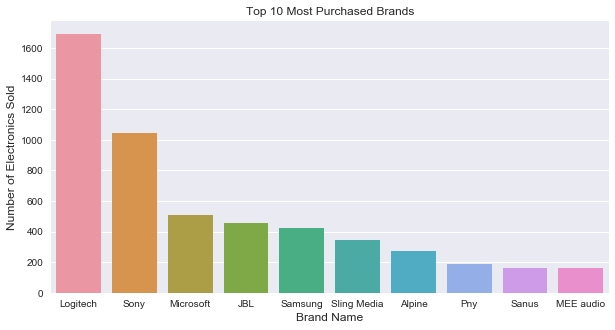

In [23]:
sales_count  = sales_data.brand.value_counts()
sales_count = sales_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(sales_count.index, sales_count.values)
plt.title('Top 10 Most Purchased Brands')
plt.ylabel('Number of Electronics Sold', fontsize=12)
plt.xlabel('Brand Name', fontsize=12)
plt.show()

In [13]:
sales_data.brand.unique()

array(['Microsoft', 'Boytone', 'Sanus', 'Ultimate Ears', 'Lowepro',
       'Corsair', 'Sdi Technologies Inc.', 'Verizon Wireless', 'JVC',
       'JBL', 'Lenovo', 'Siriusxm', 'Pny', 'Sling Media', 'Sony',
       'Midland', 'Toshiba', 'Power Acoustik', 'House of Marley',
       'Yamaha', 'DreamWave', 'Glengery', 'Dell', 'MEE audio', 'Samsung',
       'Bose', 'Logitech', 'Motorola', 'Definitive Technology', 'Alpine',
       'Belkin', 'Bowers & Wilkins', 'CLARITY-TELECOM', 'Kicker', 'SVS',
       'WD', 'Netgear', 'Peerless-AV'], dtype=object)

In [20]:
sales_data['reviews.rating'].value_counts()

5.0    4492
4.0    1663
3.0     440
1.0     318
2.0     222
Name: reviews.rating, dtype: int64

In [36]:
ratings = sales_data[['brand', 'reviews.rating']]

In [58]:
def get_ratings(rating_data, brands):
    rating_df = { 'brand': [], 'rating: 1': [], 'rating: 2': [] , 'rating: 3': [], 'rating: 4': [], 'rating: 5': [] }
    for i in range(len(brands)):
        brand = brands[i]
        rate_1, rate_2, rate_3, rate_4, rate_5 = (0, 0, 0, 0, 0)
        for j in range(len(rating_data)):
            if rating_data.iloc[j].brand == brand: 
                if rating_data.iloc[j]['reviews.rating'] == 1: 
                    rate_1 += 1 
                elif rating_data.iloc[j]['reviews.rating'] == 2: 
                    rate_2 += 1 
                elif rating_data.iloc[j]['reviews.rating'] == 3: 
                    rate_3 += 1 
                elif rating_data.iloc[j]['reviews.rating'] == 4: 
                    rate_4 += 1 
                elif rating_data.iloc[j]['reviews.rating'] == 5: 
                    rate_5 += 1 
        rating_df['brand'].append(brand)
        rating_df['rating: 1'].append(rate_1)
        rating_df['rating: 2'].append(rate_2)
        rating_df['rating: 3'].append(rate_3)
        rating_df['rating: 4'].append(rate_4)
        rating_df['rating: 5'].append(rate_5)
    
    
    rating_df = pd.DataFrame( data = rating_df )
    return rating_df

In [61]:
#result = get_ratings(ratings, ratings.brand.unique())
result

,brand,rating: 1,rating: 2,rating: 3,rating: 4,rating: 5
0,Microsoft,7,9,18,104,357
1,Boytone,3,1,3,20,48
2,Sanus,3,3,11,45,100
3,Ultimate Ears,4,0,11,33,52
4,Lowepro,1,3,2,32,93
5,Corsair,1,0,2,15,96
6,Sdi Technologies Inc.,7,2,10,54,81
7,Verizon Wireless,2,2,16,33,87
8,JVC,1,0,7,35,91
9,JBL,20,13,31,105,285
